# **Importing Files for Sentiment Analysis over Human Facial Features**

In [ ]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras import regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import cv2

## **The Working Principle and Soft Computing Application**
<br><br>
###  **Back Propogation Neural Network (BPNN) and Convolutional Neural Network (CNN) Application**

The feature extraction performed by the base consists of three basic operations:




Filter an image for a particular feature (convolution)
Detect that feature within the filtered image (ReLU)
Condense the image to enhance the features (maximum pooling)
The next figure illustrates this process. You can see how these three operations are able to isolate some particular characteristic of the original image (in this case, horizontal lines).

An example of the feature extraction process.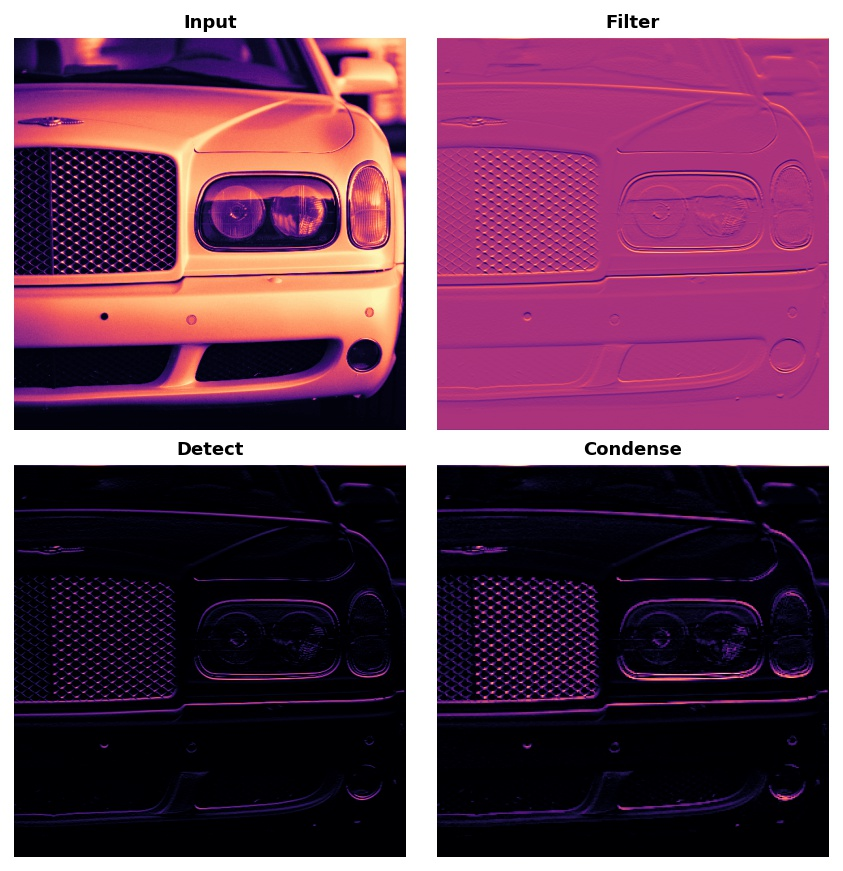

Weights
The weights a convnet learns during training are primarily contained in its convolutional layers. These weights we call kernels. We can represent them as small arrays:

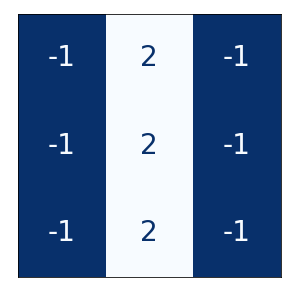<br><br>
A 3x3 kernel.
A kernel operates by scanning over an image and producing a weighted sum of pixel values. In this way, a kernel will act sort of like a polarized lens, emphasizing or deemphasizing certain patterns of information.

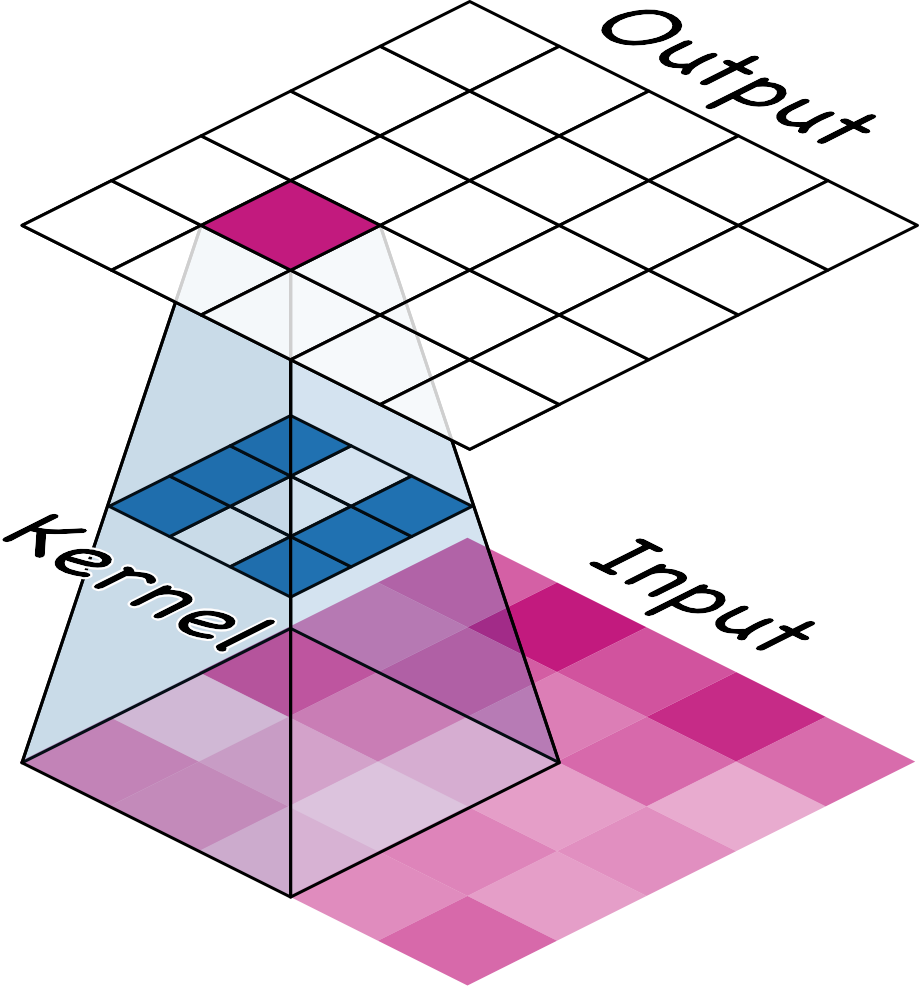



# **Stride <br><br>**
The distance the window moves at each step is called the stride. We need to specify the stride in both dimensions of the image: one for moving left to right and one for moving top to bottom. This animation shows strides=(2, 2), a movement of 2 pixels each step.

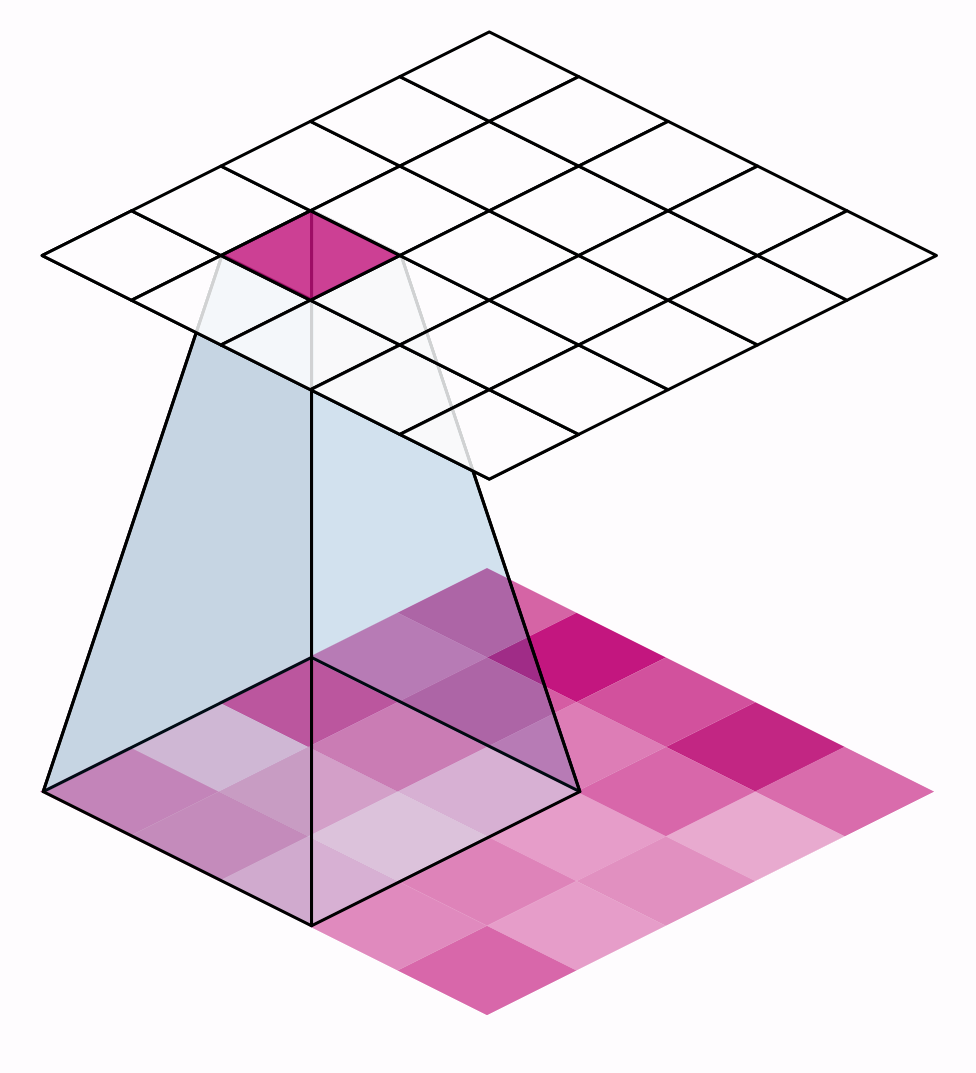



# **Padding**
When performing the sliding window computation, there is a question as to what to do at the boundaries of the input. Staying entirely inside the input image means the window will never sit squarely over these boundary pixels like it does for every other pixel in the input. Since we aren't treating all the pixels exactly the same, could there be a problem?

What the convolution does with these boundary values is determined by its padding parameter. In TensorFlow, you have two choices: either **padding='same' or padding='valid'**

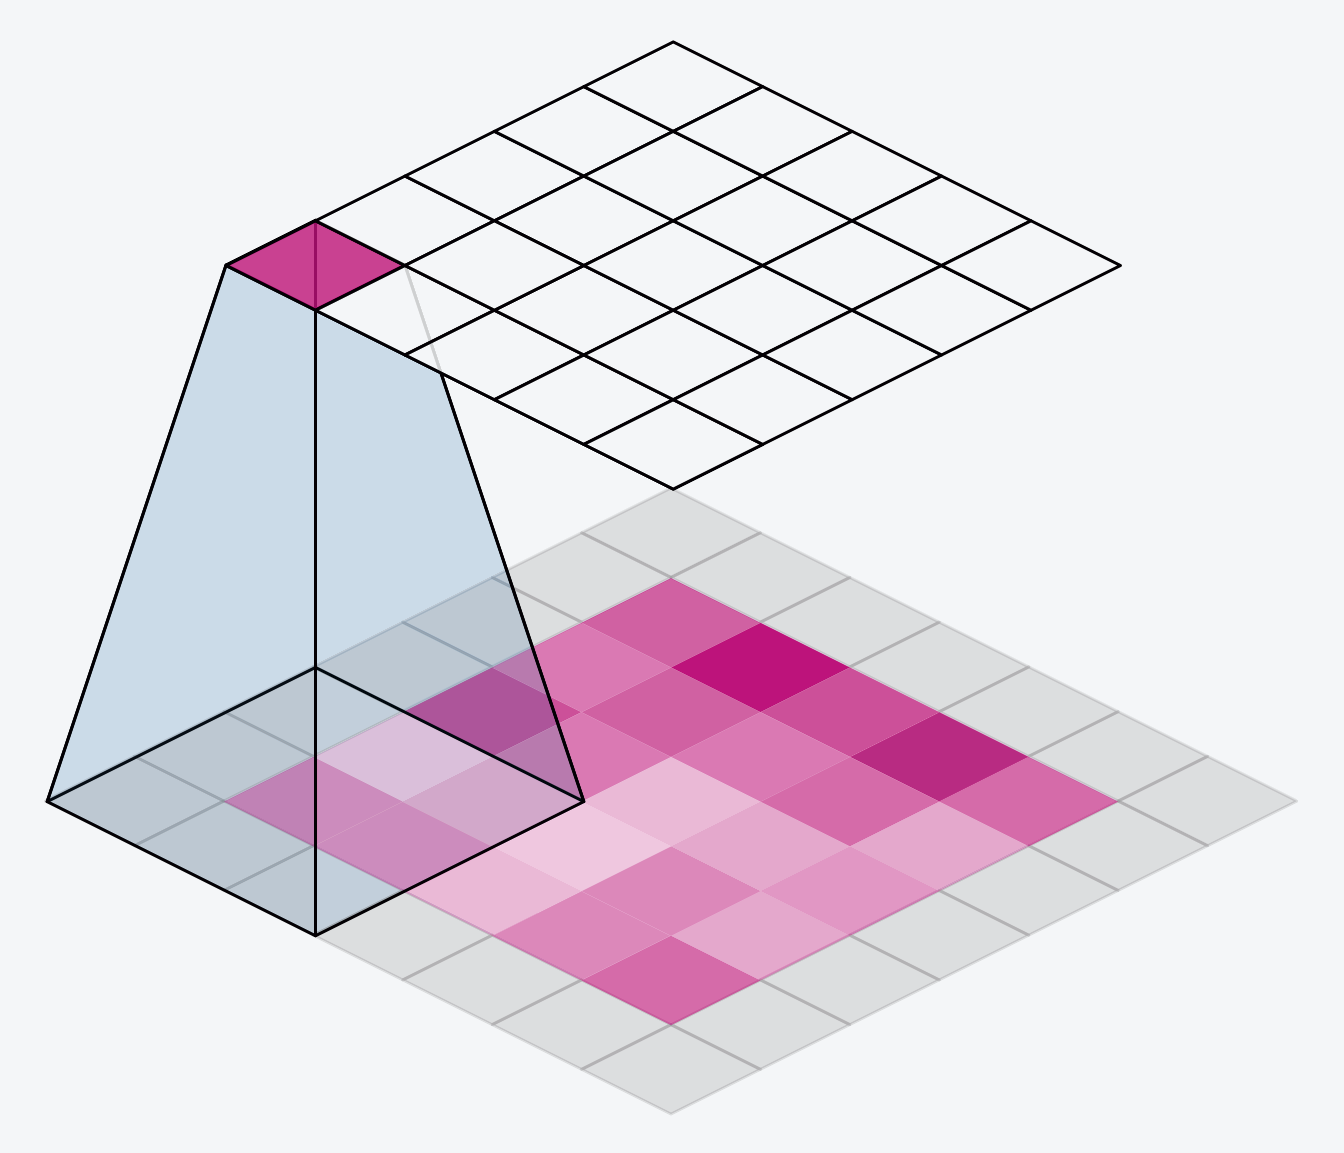

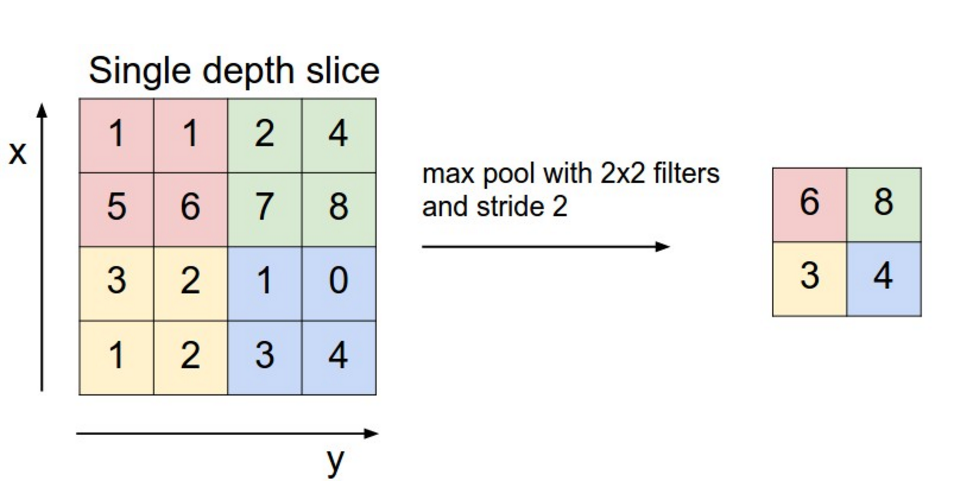

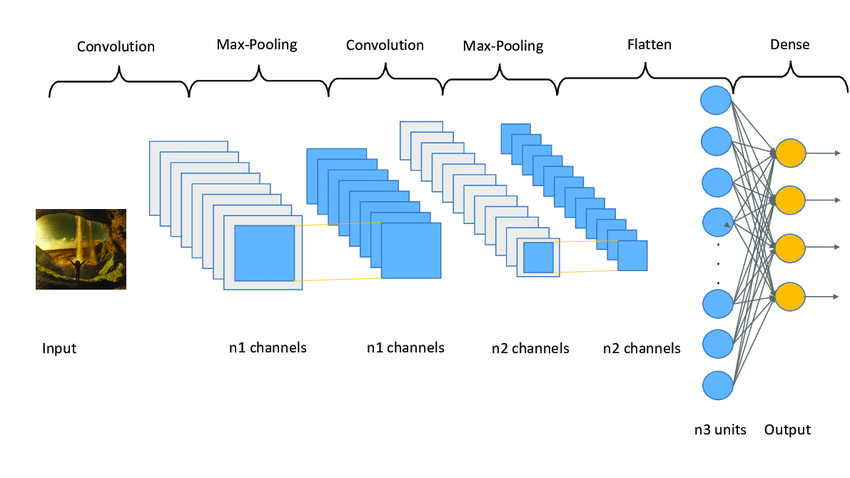

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Unziping the dataset file:
!unzip gdrive/My\ Drive/CA-1/Dataset/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
train_dir = 'train'
test_dir = 'test'

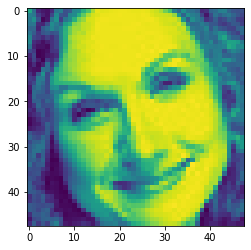

In [ ]:
# Image viewing:
img = image.load_img('train/happy/Training_10181727.jpg', target_size=(48,48), color_mode='grayscale')
plt.imshow(img)

In [ ]:
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + '/' + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       disgust  angry  surprise  happy  neutral   sad  fear
train      436   3995      3171   7215     4965  4830  4097
      disgust  angry  surprise  happy  neutral   sad  fear
test      111    958       831   1774     1233  1247  1024


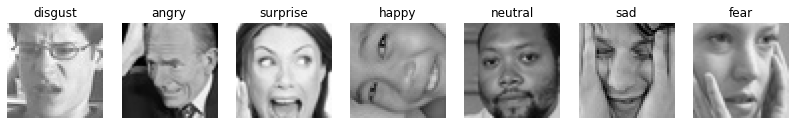

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

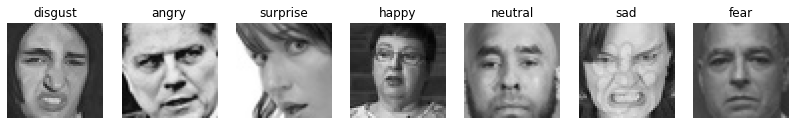

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(test_dir):
    img = load_img((test_dir + '/' + expression +'/'+ os.listdir(test_dir + '/' + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

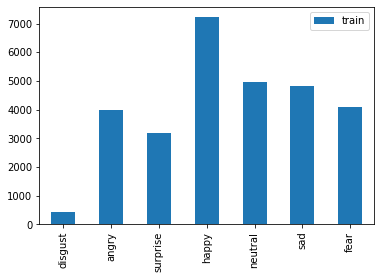

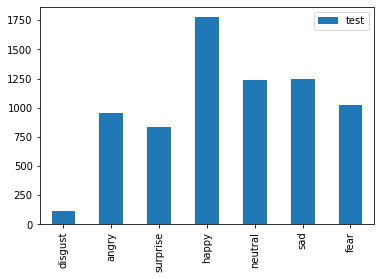

In [ ]:
train_count.transpose().plot(kind='bar')
test_count.transpose().plot(kind='bar')

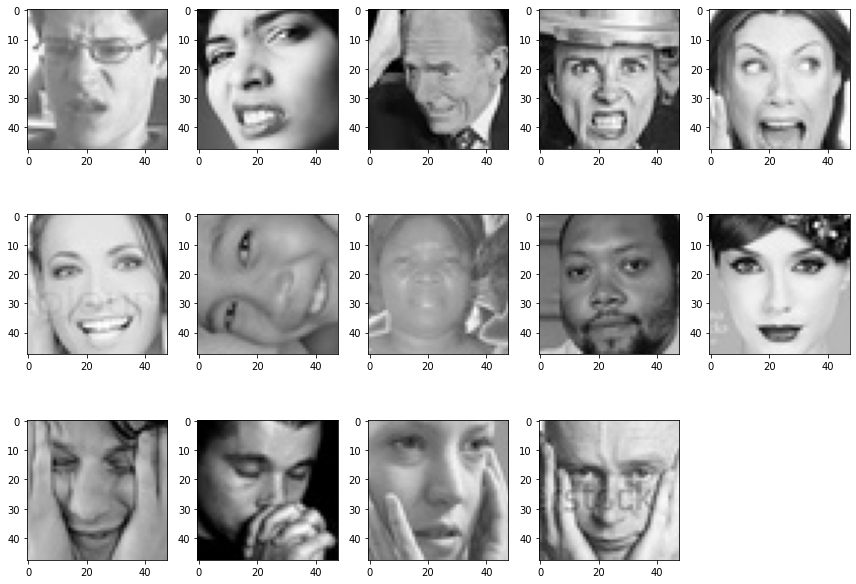

In [ ]:
img_size = 48
plt.figure(0, figsize=(12,20))
index = 0
for link in os.listdir(train_dir):
    for i in range(1,3):
        index += 1
        plt.subplot(7,5,index)
        img = load_img(train_dir + "/"+link + "/" +os.listdir(train_dir +"/"+ link)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()

In [ ]:
train_gen = ImageDataGenerator(rotation_range=20,
                              rescale=1./255,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              width_shift_range=0.1,
                              height_shift_range=0.1)

training_data = train_gen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=64,
                                             color_mode = "grayscale",
                                             class_mode = "categorical")

Found 28709 images belonging to 7 classes.


In [ ]:
valid_gen = ImageDataGenerator(rescale=1./255)

valid_data = valid_gen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=64,
                                          color_mode='grayscale',
                                          class_mode='categorical')

Found 7178 images belonging to 7 classes.


VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date applying Transfer Learning

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg = VGG19(weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

In [ ]:
training_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
input = Input(shape=(224,224,1))
#convolution layer
conv = Conv2D(3, kernel_size=(3,3), padding='same')(input)

vgg = vgg(conv)
    
x = Flatten()(vgg)

pred = Dense(7, activation='softmax')(x)

model = Model(inputs=input, outputs=pred)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 7)                 175623    
                                                                 
Total params: 20,200,037
Trainable params: 175,653
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Model Compilation
model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(training_data, epochs=15, validation_data = valid_data)

Epoch 1/15
449/449 [==============================] - 614s 1s/step - loss: 1.6587 - accuracy: 0.3425 - val_loss: 1.5180 - val_accuracy: 0.4269
Epoch 2/15
449/449 [==============================] - 595s 1s/step - loss: 1.5339 - accuracy: 0.4105 - val_loss: 1.4608 - val_accuracy: 0.4355
Epoch 3/15
449/449 [==============================] - 596s 1s/step - loss: 1.4816 - accuracy: 0.4338 - val_loss: 1.4060 - val_accuracy: 0.4654
Epoch 4/15
449/449 [==============================] - 596s 1s/step - loss: 1.4387 - accuracy: 0.4555 - val_loss: 1.3548 - val_accuracy: 0.4820
Epoch 5/15
449/449 [==============================] - 596s 1s/step - loss: 1.4128 - accuracy: 0.4566 - val_loss: 1.3225 - val_accuracy: 0.4951
Epoch 6/15
449/449 [==============================] - 596s 1s/step - loss: 1.3921 - accuracy: 0.4729 - val_loss: 1.3332 - val_accuracy: 0.4982
Epoch 7/15
449/449 [==============================] - 596s 1s/step - loss: 1.3701 - accuracy: 0.4817 - val_loss: 1.2971 - val_accuracy: 0.5123

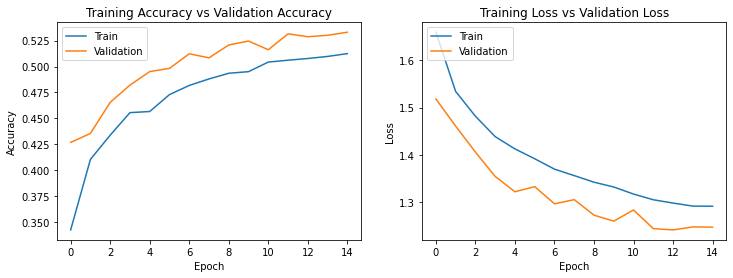

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(training_data)
test_loss, test_acc = model.evaluate(valid_data)

113/113 [==============================] - 63s 554ms/step - loss: 1.2479 - accuracy: 0.5330


In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

(224, 224)


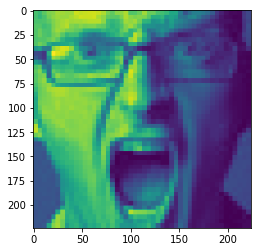

In [ ]:
test_img1 = image.load_img('test/angry/PrivateTest_13278552.jpg',target_size = (224,224),color_mode = "grayscale")
plt.imshow(test_img1)
print(test_img1.size)

In [ ]:
img = image.img_to_array(test_img1)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,224,224,1)
result = model.predict(img)
result = list(result[0])


img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


(224, 224)


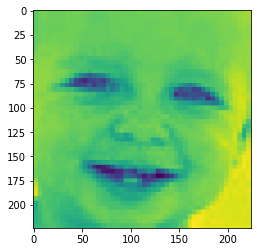

In [ ]:
test_img3 = image.load_img('test/happy/PrivateTest_1140198.jpg',target_size = (224,224),color_mode = "grayscale")
plt.imshow(test_img3)
print(test_img3.size)

In [ ]:
img = image.img_to_array(test_img3)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,224,224,1)
result = model.predict(img)
result = list(result[0])


img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


(224, 224)


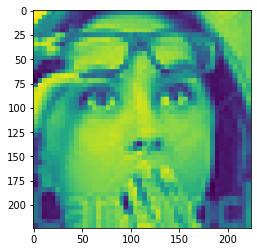

In [ ]:
test_img4 = image.load_img('test/surprise/PrivateTest_16757278.jpg',target_size = (224,224),color_mode = "grayscale")
plt.imshow(test_img4)
print(test_img4.size)

In [ ]:
img = image.img_to_array(test_img4)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,224,224,1)
result = model.predict(img)
result = list(result[0])


img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Surprise


In [ ]:
model.save('model_optimal.h5')